# Containerised Jupyter Notebook Access from Docker Container

In [1]:
print('Hello world from Dockerised AMICI')

Hello world from Dockerised AMICI


In [2]:
import os 
path = os.getcwd()
print('Current working directory:', path)

# change the working directory to '/\new-peak-project'

os.chdir('/new-peak-project/src')
print('Changed working directory to:', os.getcwd())

Current working directory: /app
Changed working directory to: /new-peak-project/src


In [3]:
# set the results directory to '/new-peak-project/src/experiments'

results_path = '/new-peak-project/src/experiments'

In [4]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *
from models.Utils import *

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# import scikit-learn
from sklearn.linear_model import LinearRegression
# tree models and support vector machines
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import pearson correlation
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from copy import deepcopy

import amici

In [6]:
import os 

### parameters 
notebook_name = 'generate_large_model'
sub_id = '1'

## Generation of ground truth model 
model_name = 'v3_small_model_52'
o_random_seed = 6 
parameter_random_seed = 6
no_observable_species = 5
no_feedback_regulations = 2
specie_value_range = (5, 5000)
param_range = (0.1, 10)
param_multiplier_range = (0.7, 1.3)


## Simulation parameters 
simulation_time = 500 
simulation_step = 100

## Feature data generation 
feature_generation_method = 'uniform'
feature_generation_extra_params = {'min': 0.1, 'max': 10}
feature_generation_size = 1000 
feature_generation_seed = 50 # if -1 then 'o_random_seed' is used
if feature_generation_seed == -1:
    feature_generation_seed = o_random_seed
    
## Data engineering parameters

# Suboptimal Model Generation 
'''
Options: 
- 'feedback_prune': removes feedback regulations from the model 
'''

# Engineering Feature Data 
data_engineering_method = 'dynamic_feature'
''' 
Options: 
- 'last_time_point' : only the last time point of the phosphorylated species is used
- 'dynamic_feature': computes the characteristic 'ten' dynamic feature for each specie data 
'''

## General parameters
parallelise = True
save_figures = True 
experiment_id = notebook_name + '_' + sub_id
experiment_folder = results_path + '/' + experiment_id + '/'
if not os.path.exists(experiment_folder):
    os.makedirs(experiment_folder)
    
print(experiment_folder)

/new-peak-project/src/experiments/generate_large_model_1/


In [7]:
### Generate the ground truth model
model_name = 'example_model_2'
seed = 5
num_species = 100
num_feedback = 25

model_spec = ModelSpecification()
model_spec.generate_specifications(seed, num_species, num_feedback, verbose=0)
# G0 = model_spec.generate_network(model_name, specie_value_range, param_range, param_multiplier_range, random_seed=parameter_random_seed, verbose=0)
# runner = roadrunner.RoadRunner(G0.get_sbml_model())

In [8]:
G0 = model_spec.generate_network(model_name, specie_value_range, param_range, param_multiplier_range, random_seed=parameter_random_seed, verbose=0)

In [9]:
print(G0)

Model Name example_model_2
Number of Reactions 402
Number of State Variables 402
Number of Parameters 1029
Number of Custom Variables 0
Number of Enforced State Values 0
Number of Custom Strings 0



In [10]:
# save the sbml model to the results folder
sbml_file = experiment_folder + model_name + '.xml'
with open(sbml_file, 'w') as f:
    f.write(G0.get_sbml_model())
print('SBML model saved to:', sbml_file)

SBML model saved to: /new-peak-project/src/experiments/generate_large_model_1/example_model_2.xml


## Use AMICI to simulate model

In [11]:
import amici

sbml_importer = amici.SbmlImporter("/new-peak-project/src/experiments/generate_large_model_1/example_model_2.xml")

In [12]:
model_name = "example_model_2"
model_dir = "model_dir"
sbml_importer.sbml2amici(model_name, model_dir)

In [13]:
# load the model module
model_module = amici.import_model_module(model_name, model_dir)
# instantiate model
model = model_module.getModel()
# instantiate solver
solver = model.getSolver()

In [14]:
solver.setAbsoluteTolerance(1e-10)

In [15]:
# Create Model instance
model = model_module.getModel()

# set timepoints for which we want to simulate the model
model.setTimepoints(np.linspace(0, 500, 500))

# Create solver instance
solver = model.getSolver()

# Run simulation using default model parameters and solver options
rdata = amici.runAmiciSimulation(model, solver)

In [16]:
print(
    "Simulation was run using model default parameters as specified in the SBML model:"
)
print(dict(zip(model.getParameterIds(), model.getParameters())))

Simulation was run using model default parameters as specified in the SBML model:
{'J0_Vmax': 59.6701997160446, 'J0_Km': 803.812418082489, 'J1_Vmax': 62.3557554745281, 'J1_Km': 748.423394091512, 'J2_Vmax': 70.7459197166088, 'J2_Km': 583.226519428443, 'J3_Vmax': 118.037959973512, 'J3_Km': 633.921332922711, 'J4_Vmax': 60.4847224272366, 'J4_Km': 513.678174641506, 'J5_Vmax': 72.9529650558008, 'J5_Km': 918.212536216799, 'J6_Vmax': 33.9725553604726, 'J6_Km': 170.254331223447, 'J7_Vmax': 90.3389377022296, 'J7_Km': 478.404675305507, 'J8_Vmax': 105.347852906829, 'J8_Km': 852.075162248349, 'J9_Vmax': 68.5883667172101, 'J9_Km': 468.859837638353, 'J10_Vmax': 42.7874520359126, 'J10_Km': 960.097887102651, 'J11_Vmax': 8.53195576028939, 'J11_Kw0': 0.424976130135079, 'J11_Km': 502.418129225512, 'J12_Vmax': 24.067173437476, 'J12_Km': 861.610950388427, 'J13_Vmax': 113.986466807046, 'J13_Km': 904.157576778734, 'J14_Vmax': 61.3306989456691, 'J14_Km': 677.95481056924, 'J15_Vmax': 5.72985121606457, 'J15_Kw0'

In [17]:
time_points = rdata.ts
res = rdata.x.T
res_states = model.getStateNames()

In [18]:
print(res.shape)

(402, 500)


In [19]:
# extract the first 500 time points for a specific specie

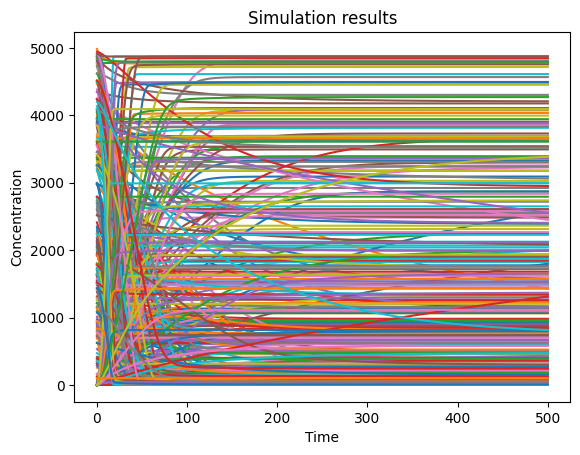

In [20]:
# use matplotlib to plot the results of each res 
import matplotlib.pyplot as plt
import seaborn as sns


for i in range(res.shape[0]):
    plt.plot(time_points, res[i,:], label=res_states[i])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Simulation results')
plt.show()